In [ ]:
# Dataset : https://www.dropbox.com/s/89wqb9wqr0b5opg/covid_19.zip?dl=0

!wget https://www.dropbox.com/s/dx71frwfklsrplr/CovidDataset.zip?dl=0

--2022-04-12 19:10:46--  https://www.dropbox.com/s/dx71frwfklsrplr/CovidDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dx71frwfklsrplr/CovidDataset.zip [following]
--2022-04-12 19:10:46--  https://www.dropbox.com/s/raw/dx71frwfklsrplr/CovidDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53e48b5aab448b27e9e2341c9a.dl.dropboxusercontent.com/cd/0/inline/BjRdPF0fhGnEF0GB_paJ4Bq5UJmjWawikIowViesr-ehxZQrSAGSXC32RTzGC-a7AJHmMivBCySMBJg6LXVZ3HMceG9mgrzfgmcMa_zhM_d5M6lELnySUOzDfMfW2nz82xAZdSDJbyLeFx1fYgmeydUawyJslyTZeSO-lgcKnAQE1w/file# [following]
--2022-04-12 19:10:47--  https://uc53e48b5aab448b27e9e2341c9a.dl.dropboxusercontent.com/cd/0/inline/BjRdPF0fhGnEF0GB_paJ4Bq5UJmjWawikIowViesr-ehxZQrSAG

In [ ]:
!unzip CovidDataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: CovidDataset/Train/COVID/COVID-92.png  
  inflating: CovidDataset/Train/COVID/COVID-920.png  
  inflating: CovidDataset/Train/COVID/COVID-921.png  
  inflating: CovidDataset/Train/COVID/COVID-922.png  
  inflating: CovidDataset/Train/COVID/COVID-923.png  
  inflating: CovidDataset/Train/COVID/COVID-924.png  
  inflating: CovidDataset/Train/COVID/COVID-925.png  
  inflating: CovidDataset/Train/COVID/COVID-926.png  
  inflating: CovidDataset/Train/COVID/COVID-927.png  
  inflating: CovidDataset/Train/COVID/COVID-928.png  
  inflating: CovidDataset/Train/COVID/COVID-929.png  
  inflating: CovidDataset/Train/COVID/COVID-93.png  
  inflating: CovidDataset/Train/COVID/COVID-930.png  
  inflating: CovidDataset/Train/COVID/COVID-931.png  
  inflating: CovidDataset/Train/COVID/COVID-932.png  
  inflating: CovidDataset/Train/COVID/COVID-933.png  
  inflating: CovidDataset/Train/COVID/COVID-934.png  
  inflating: CovidDataset/Train/C

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 5252 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',shuffle= False)

Found 2254 images belonging to 2 classes.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/20
6/6 [==============================] - 11s 1s/step - loss: 1.3520 - accuracy: 0.4948 - val_loss: 0.7054 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 5s 862ms/step - loss: 0.6878 - accuracy: 0.5208 - val_loss: 0.6383 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 5s 788ms/step - loss: 0.6789 - accuracy: 0.5573 - val_loss: 0.7081 - val_accuracy: 0.0469
Epoch 4/20
6/6 [==============================] - 5s 798ms/step - loss: 0.6826 - accuracy: 0.5573 - val_loss: 0.7174 - val_accuracy: 0.0938
Epoch 5/20
6/6 [==============================] - 5s 812ms/step - loss: 0.6779 - accuracy: 0.5781 - val_loss: 0.6931 - val_accuracy: 0.5938
Epoch 6/20
6/6 [==============================] - 5s 819ms/step - loss: 0.6729 - accuracy: 0.6094 - val_loss: 0.7003 - val_accuracy: 0.4844
Epoch 7/20
6/6 [==============================] - 5s 815ms/step - loss: 0.6570 - accuracy: 0.6250 - val_loss: 0.6049 - val_accuracy: 0.8750
Epoch 8/20
6/6 [==

In [ ]:
model.evaluate(train_generator)

165/165 [==============================] - 77s 466ms/step - loss: 0.5991 - accuracy: 0.7163


[0.5990539193153381, 0.7162985801696777]

In [ ]:
model.evaluate(validation_generator)

71/71 [==============================] - 12s 161ms/step - loss: 0.6678 - accuracy: 0.6012


[0.6677985787391663, 0.6011534929275513]

In [ ]:
loss = hist.history

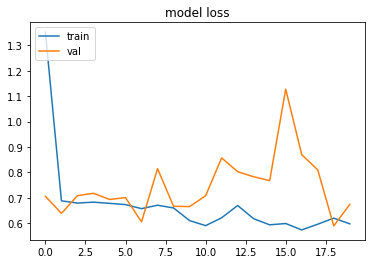

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

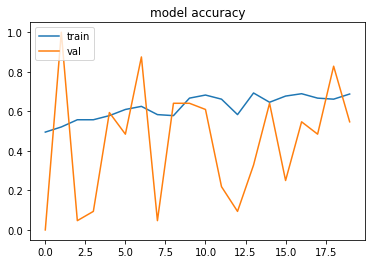

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("model_covid.h5")

In [ ]:
pred = []
for i in model.predict(validation_generator).reshape(1,-1)[0]:
    pred.append(np.round(i))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(pred,validation_generator.classes))

              precision    recall  f1-score   support

         0.0       0.49      0.63      0.55       882
         1.0       0.71      0.58      0.64      1372

    accuracy                           0.60      2254
   macro avg       0.60      0.61      0.60      2254
weighted avg       0.62      0.60      0.61      2254



In [ ]:
import seaborn as sns

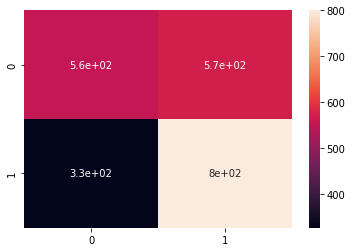

In [ ]:
sns.heatmap(confusion_matrix(validation_generator.classes,pred),annot = True)